# Lab 3 Samuel Bieberich


## 1. First Order Model of a ZOH Sampling Circuit  

Construct a model for a sampling circuit shown in Fig. 1.  

When the NMOS switch M1 is ON (Vsw = 1), the sampling circuit behaves as a series RC circuit and the input Vin is sampled on the capacitor. When the switch turns OFF (Vsw = 0), the voltage on the capacitor is held constant until the beginning of the next sampling phase. If the ON resistance of the switch is R, then the time constant of the sampler, τ, is R*C.  

### 1.a  
For an input sinusoidal signal of frequency 1 GHz, a sampling frequency of 10 GHz, amplitude of 2V, and time constant of 10 ps, plot the output of the sampling circuit.  


In [4]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

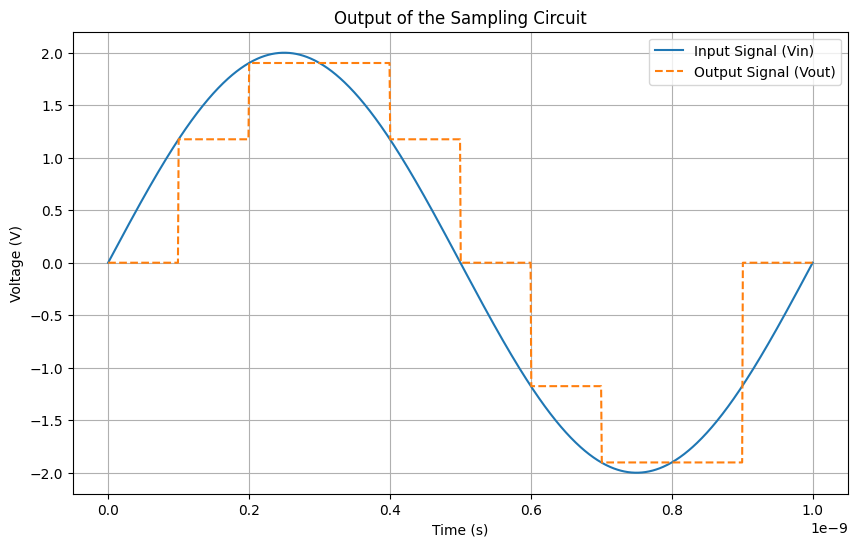

In [5]:
f_in = 1e9  
f_s = 10e9 
A = 2  
tau = 10e-12  

t = np.linspace(0, 1/f_in, 1000)

vin = A * np.sin(2 * np.pi * f_in * t)

t_sample = np.arange(0, 1/f_in, 1/f_s)

vin_sampled = A * np.sin(2 * np.pi * f_in * t_sample)

vout = np.zeros_like(t)
for i in range(len(t_sample) - 1):
    vout[(t >= t_sample[i]) & (t < t_sample[i+1])] = vin_sampled[i]

plt.figure(figsize=(10, 6))
plt.plot(t, vin, label='Input Signal (Vin)')
plt.plot(t, vout, label='Output Signal (Vout)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Output of the Sampling Circuit')
plt.legend()
plt.grid(True)
plt.show()

## 2. Sampling Error  

Sampling error is the difference between an ideally sampled signal (delta train) and a signal sampled with a finite time constant sampling circuit.  

### 2.a  
Assume an NRZ input of amplitude 0.5 V and data rate of 10 Gb/s. Sample the input signal once in the middle of every bit period. Assuming a 50% duty cycle for Vsw, what should the time constant be for the maximum sampling error to be less than 1 LSB for a 7-bit ADC with a full-scale range of 1 V? Justify with an equation the obtained time constant value.  


In [ ]:
# Given values
A = 0.5  # Amplitude of NRZ input in V
f_data = 10e9  # Data rate in Hz
f_s = 10e9  # Sampling frequency in Hz
full_scale_range = 1  # Full-scale range of ADC in V
n_bits = 7  # Number of bits of ADC

# Calculate 1 LSB
LSB = full_scale_range / (2**n_bits)

# Maximum allowable error
max_error = LSB

# Sampling period
T_sample = 1 / f_s

# Calculate the time constant
tau = -T_sample / np.log(max_error / A)

print(f"1 LSB for a {n_bits}-bit ADC with a full-scale range of {full_scale_range} V is {LSB:.6f} V")
print(f"Maximum allowable sampling error: {max_error:.6f} V")
print(f"Sampling period: {T_sample:.6e} s")
print(f"Calculated time constant (tau) should be greater than: {tau:.2e} s")

1 LSB for a 7-bit ADC with a full-scale range of 1 V is 0.007812 V
Maximum allowable sampling error: 0.007812 V
Sampling period: 1.000000e-10 s
Calculated time constant (tau) should be greater than: 2.40e-11 s


### 2.b  
Assume a multi-tone signal input with frequencies of 0.2 GHz, 0.58 GHz, 1 GHz, 1.7 GHz, and 2.4 GHz, and a sampling frequency of 10 GHz. What should the time constant be for the sampling error to be less than 1 LSB for a 7-bit ADC? Is it different from the time constant in 2.a? Why?  


In [7]:
# Given values
frequencies = [0.2e9, 0.58e9, 1e9, 1.7e9, 2.4e9]  # Frequencies in Hz
f_s = 10e9  # Sampling frequency in Hz
full_scale_range = 1  # Full-scale range of ADC in V
n_bits = 7  # Number of bits of ADC

# Calculate 1 LSB
LSB = full_scale_range / (2**n_bits)

# Maximum allowable error
max_error = LSB

# Sampling period
T_sample = 1 / f_s

# Calculate the time constant for each frequency
taus = []
for f in frequencies:
    A = 1  # Assume amplitude of 1V for simplicity
    tau = -T_sample / np.log(max_error / A)
    taus.append(tau)

# The required time constant should be the minimum of the calculated time constants
tau_min = min(taus)

print(f"1 LSB for a {n_bits}-bit ADC with a full-scale range of {full_scale_range} V is {LSB:.6f} V")
print(f"Maximum allowable sampling error: {max_error:.6f} V")
print(f"Sampling period: {T_sample:.6e} s")
print(f"Calculated time constants for each frequency: {taus}")
print(f"Minimum time constant (tau) should be greater than: {tau_min:.2e} s")

1 LSB for a 7-bit ADC with a full-scale range of 1 V is 0.007812 V
Maximum allowable sampling error: 0.007812 V
Sampling period: 1.000000e-10 s
Calculated time constants for each frequency: [np.float64(2.060992915555662e-11), np.float64(2.060992915555662e-11), np.float64(2.060992915555662e-11), np.float64(2.060992915555662e-11), np.float64(2.060992915555662e-11)]
Minimum time constant (tau) should be greater than: 2.06e-11 s
